In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [56]:
df = pd.read_csv('Sample - Superstore.csv', encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [57]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [60]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

In [71]:

df['Year'] = df['Order Date'].dt.year
print(df['Year'])

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Year, Length: 9994, dtype: int32


In [62]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [61]:
monthly_sales = df.set_index('Order Date')[['Sales']].resample('M').sum()

/tmp/ipython-input-1009907756.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date')[['Sales']].resample('M').sum()


In [63]:
sales_data = monthly_sales['Sales'].reset_index()
sales_data.columns = ['ds', 'y']

In [64]:
m_sales = Prophet(
    yearly_seasonality=True,
    changepoint_prior_scale=0.05
)

In [65]:
m_sales.fit(sales_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future_sales = m_sales.make_future_dataframe(periods=6, freq='M')

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [67]:
forecast_sales = m_sales.predict(future_sales)


--- Sales Predciton Chart ---


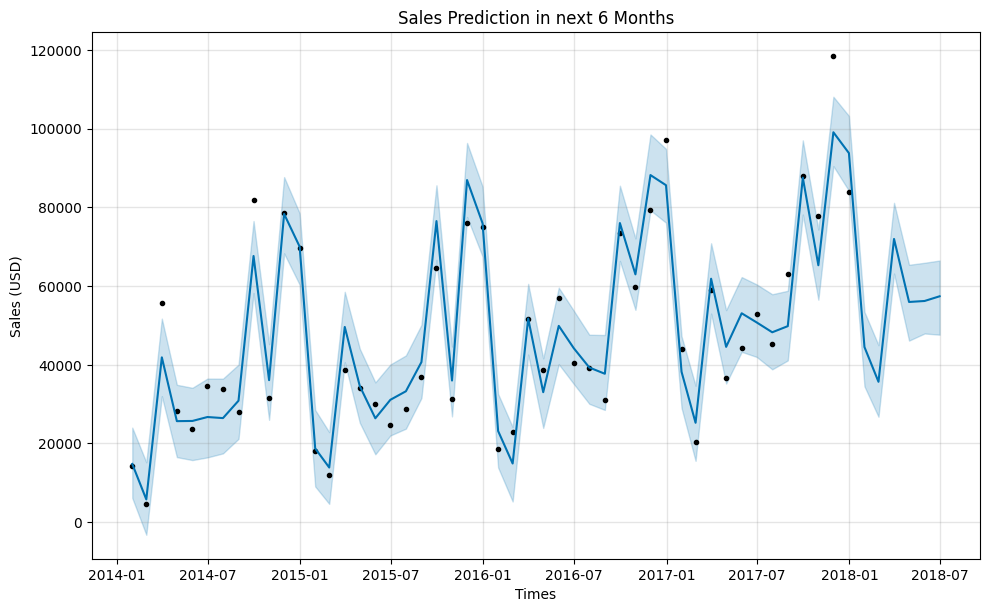


--- Trend ---


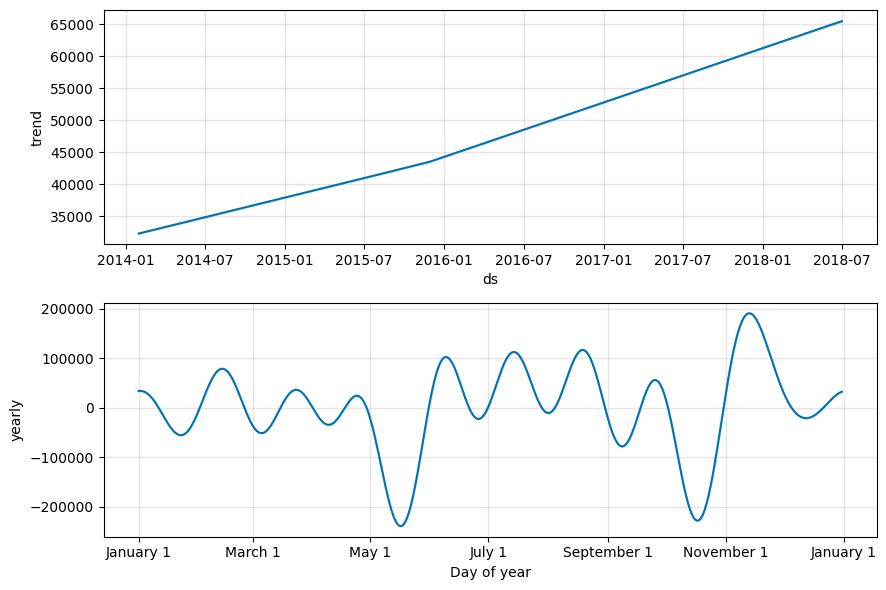


--- Rresult of sales in next 6 months ---
| Month   |   Sales Prediction |   Lower Confidence Interval |   Upper Confidence Interval |
|:--------|-------------------:|----------------------------:|----------------------------:|
| 2018-01 |            44491.1 |                     34510.8 |                     53413.6 |
| 2018-02 |            35661.2 |                     26781.5 |                     44958.4 |
| 2018-03 |            71959.6 |                     63158.5 |                     81133.4 |
| 2018-04 |            55942.2 |                     46121.7 |                     65386.9 |
| 2018-05 |            56193   |                     47933.8 |                     65900.5 |
| 2018-06 |            57388   |                     47627   |                     66472.5 |


In [74]:
print("\n--- Sales Predciton Chart ---")
fig_sales = m_sales.plot(forecast_sales)
plt.title('Sales Prediction in next 6 Months')
plt.xlabel('Times')
plt.ylabel('Sales (USD)')
plt.show()

# 2. Trực quan hóa các thành phần của chuỗi thời gian (Xu hướng, Mùa vụ)
print("\n--- Trend ---")
fig_comp = m_sales.plot_components(forecast_sales)
plt.show()

# 3. Hiển thị 6 tháng dự đoán cuối cùng
print("\n--- Rresult of sales in next 6 months ---")
# Lấy 6 hàng cuối cùng (là 6 tháng dự đoán)
forecast_sales_6months = forecast_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)
forecast_sales_6months.columns = ['Month', 'Sales Prediction', 'Lower Confidence Interval', 'Upper Confidence Interval']

# Định dạng và làm tròn giá trị
forecast_sales_6months['Month'] = forecast_sales_6months['Month'].dt.strftime('%Y-%m')
for col in ['Sales Prediction', 'Lower Confidence Interval', 'Upper Confidence Interval']:
    forecast_sales_6months[col] = forecast_sales_6months[col].round(2)

print(forecast_sales_6months.to_markdown(index=False))